In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *
from scipy.signal import argrelextrema
import warnings
warnings.filterwarnings('ignore')

In [128]:
def states_to_df(states,times):
    data = {}
    for i in range(0,states[0].shape[0]):
        which_mode = divmod(i,2)
        if which_mode[1] == 0:
            two_state = "+"
        elif which_mode[1] == 1:
            two_state = "-"
        data[str(which_mode[0])+" , "+two_state] = np.zeros(len(times),dtype="complex128")
    
    for i, state in enumerate(states):
        for j, psi in enumerate(state):
            which_mode = divmod(j,2)
            if which_mode[1] == 0:
                two_state = "+"
            elif which_mode[1] == 1:
                two_state = "-"
            data[str(which_mode[0])+" , "+two_state][i] = psi[0][0]

    return pd.DataFrame(data=data, index=times)

Let's remind ourselves of the Hamiltonian that we're working with:

$$H =  A \sigma_z + \hbar\omega\left(a^{\dagger}a +\frac{1}{2}\right) + \frac{\delta}{2}\left( a^{\dagger} + a \right)\sigma_x$$

Just like in our last couple of tutorials we'll use $A=0.1$. 

We'll again only perturb the two state system by making the coupling small  i.e. $\delta/A = 0.01 \ll 1$. 

How does the resonance that we discovered last time i.e. when $\omega = \omega_0 \equiv 2A$ change now that the field is quantised.

In [280]:
A = 0.5                   # two level energy difference
N = 3                    # number of phonon quanta needed to exite the atom
omega = 2*A / N          # phonon energy
max_bosons =  5             # Max mode number to simulation
ng = 500                  # number of different coupling strengths to try out (need 100 to reproduce SJByrnes Moiré pattern)
delta_min = 0    # min atom phonon coupling
delta_max = 0.2*A     # maximum atom phonon coupling

In [285]:
a  = tensor(destroy(max_bosons+1), qeye(2))     # tensorised boson destruction operator
sx = tensor(qeye(max_bosons+1), sigmax())             # tensorised sigma_x operator
sz = tensor(qeye(max_bosons+1),sigmaz())              # tensorised sigma_z operator

two_state     =  A*sz                          # two state system energy
bosons       =  omega*(a.dag()*a+0.5)          # bosons field energy
interaction   = (a.dag() + a) * sx     # interaction energy


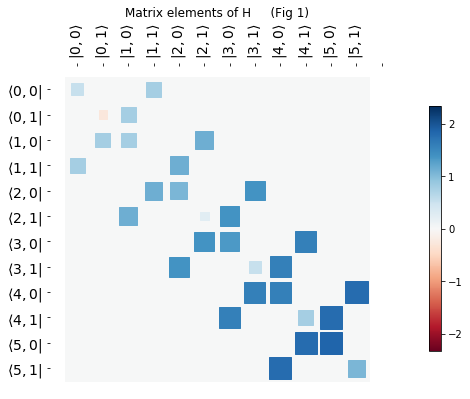

In [286]:
H = two_state + bosons + interaction
f, ax = hinton(H)
ax.tick_params(axis='x',labelrotation=90)
ax.set_title("Matrix elements of H     (Fig 1)");

In [275]:
d = {"coupling":np.linspace(0,delta_max,ng)}
for i in range(2*(max_bosons+1)):
    d[f"level_{i}"] = np.zeros(ng)
    
df = pd.DataFrame(data=d)


In [276]:
for index, row in df.iterrows():
    # c.f. https://coldfusionblog.net/2017/07/09/numerical-spin-boson-model-part-1/
    H = two_state + bosons + row.coupling/2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[index,1:] = np.real(evals/omega)
    
    

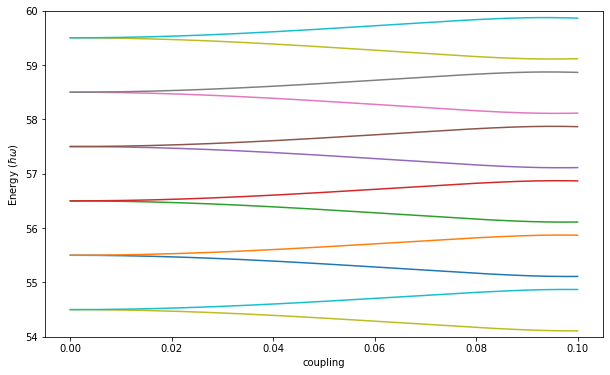

In [277]:
df.plot(x="coupling",ylim=[54,60],figsize=(10,6),legend=False);
plt.ylabel("Energy ($\hbar\omega$)");